In [1]:
import pandas as pd


In [7]:
data=pd.read_csv('/content/gpt excel sheet.csv')

In [8]:
data.head()

,d,age,sex,bmi,children,smoker,region,charges
0,1,22,F,22.5,0,yes,North,24000
1,2,35,M,28.3,1,no,South,32000
2,3,46,F,31.2,2,yes,West,45000
3,4,52,M,29.5,0,no,East,38000
4,5,29,F,23.7,1,no,North,25000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   d         50 non-null     int64  
 1   age       50 non-null     int64  
 2   sex       50 non-null     object 
 3   bmi       50 non-null     float64
 4   children  50 non-null     int64  
 5   smoker    50 non-null     object 
 6   region    50 non-null     object 
 7   charges   50 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.2+ KB


In [10]:
data.describe()


,d,age,bmi,children,charges
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,43.400000,28.512000,1.400000,39820.000000
std,14.57738,12.589273,3.604569,1.049781,14250.943399
min,1.00000,22.000000,22.500000,0.000000,22000.000000
25%,13.25000,32.250000,25.250000,1.000000,27250.000000
50%,25.50000,42.500000,28.850000,1.000000,33500.000000
75%,37.75000,53.750000,31.475000,2.000000,54750.000000
max,50.00000,66.000000,35.600000,3.000000,63000.000000


In [11]:
data.isnull().sum()

,0
d,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for column in ['sex','smoker','region']:
  le=LabelEncoder()
  data[column]=le.fit_transform(data[column])
  label_encoders[column]=le



In [13]:
print(data.head())

   d  age  sex   bmi  children  smoker  region  charges
0  1   22    0  22.5         0       1       1    24000
1  2   35    1  28.3         1       0       2    32000
2  3   46    0  31.2         2       1       3    45000
3  4   52    1  29.5         0       0       0    38000
4  5   29    0  23.7         1       0       1    25000


In [14]:
#Analysing Trends and Relationships


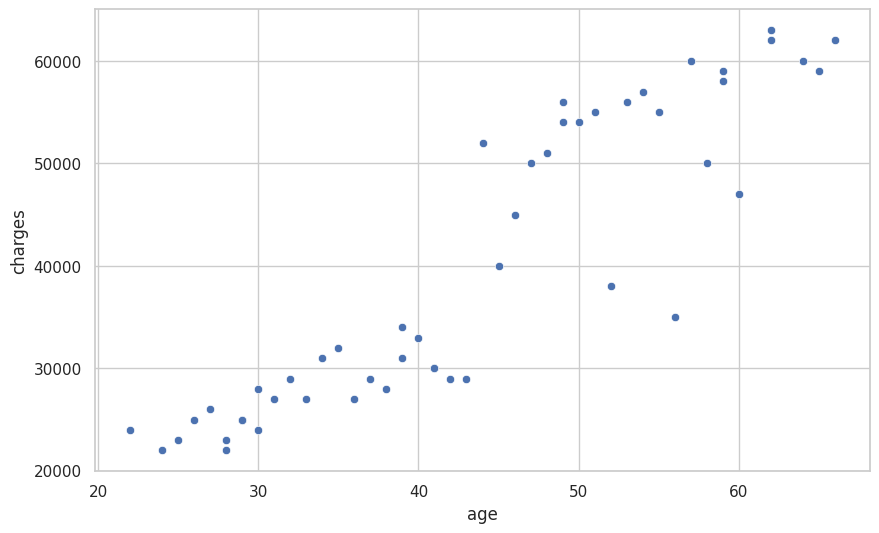

In [52]:
#Plotting Chareges vs Age
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='charges',data=data)
plt.title='Healthcare Charges based on Age'
plt.xlabel='Age'
plt.ylabel='Healthcare Charges'
plt.tight_layout
plt.show()


In [17]:
#Charges based on region

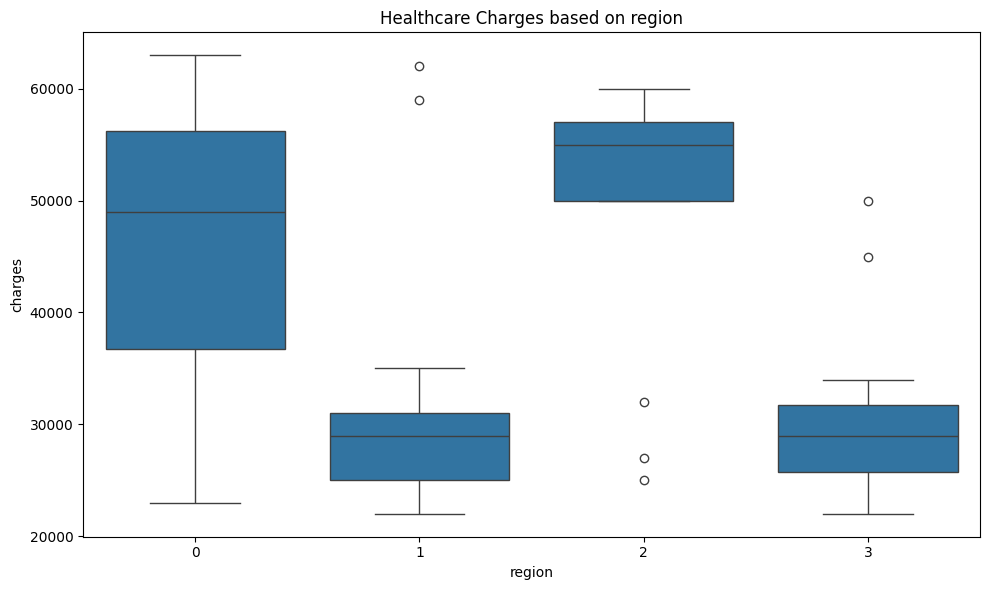

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='region',y='charges',data=data)
plt.title('Healthcare Charges based on region')
plt.xlabel='Region'
plt.ylabel='Healthcare Charges'
plt.tight_layout()
plt.show()

In [21]:
#Charges by Smoker Status

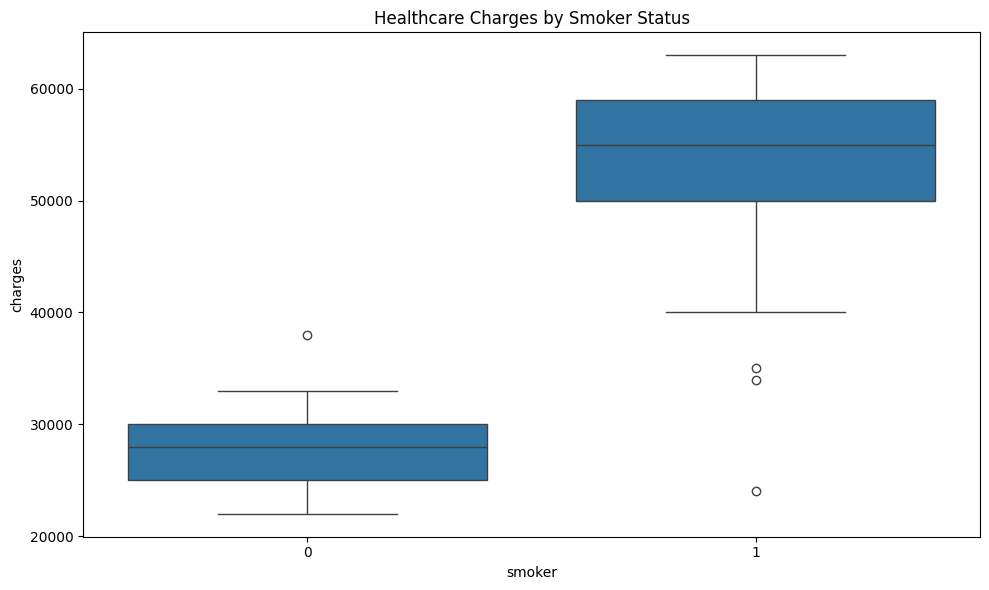

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Healthcare Charges by Smoker Status')
plt.xlabel='Smokers'
plt.ylabel='Charges'
plt.tight_layout()
plt.show()

In [26]:
 #Identifying Cost Drivers

In [27]:
#Correlation Analysis

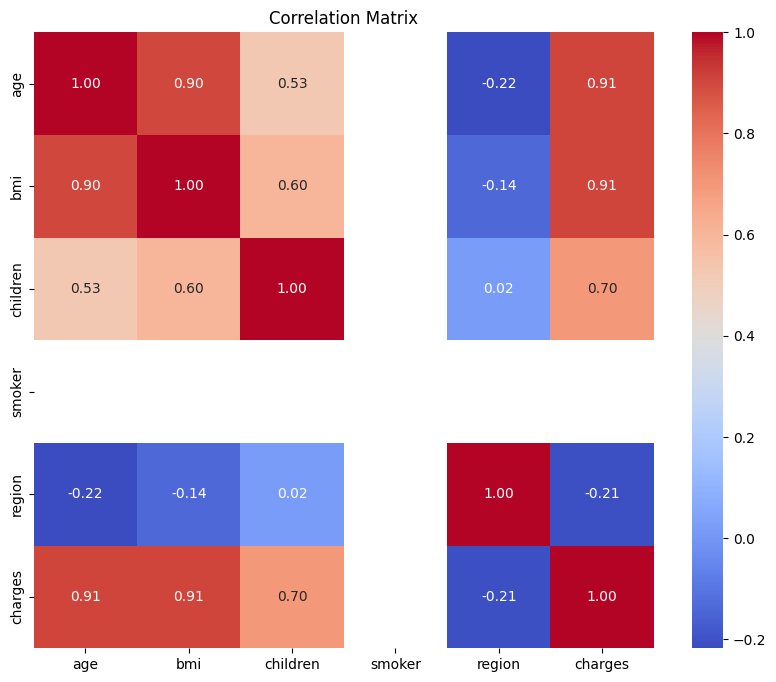

In [28]:
# Convert categorical variables to numeric
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['region'] = data['region'].astype('category').cat.codes

# Compute correlation matrix
correlation_matrix = data[['age', 'bmi', 'children', 'smoker', 'region', 'charges']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

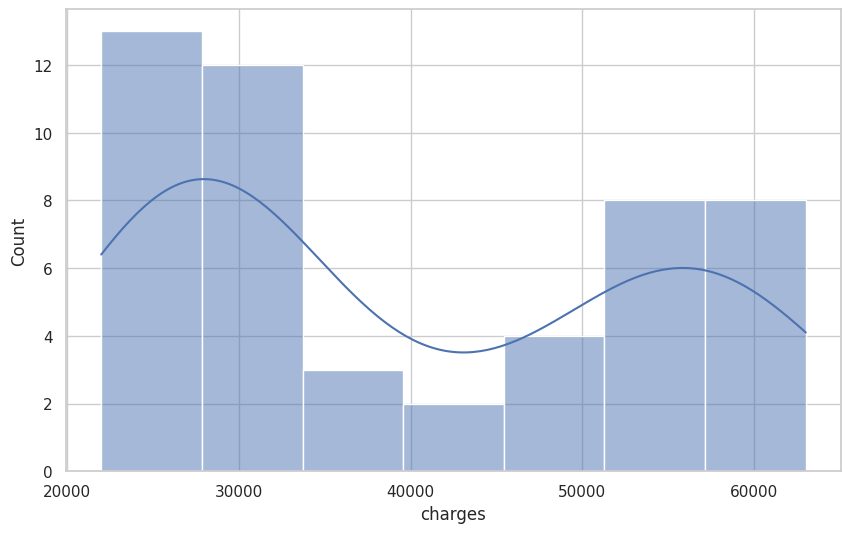

TypeError: 'str' object is not callable

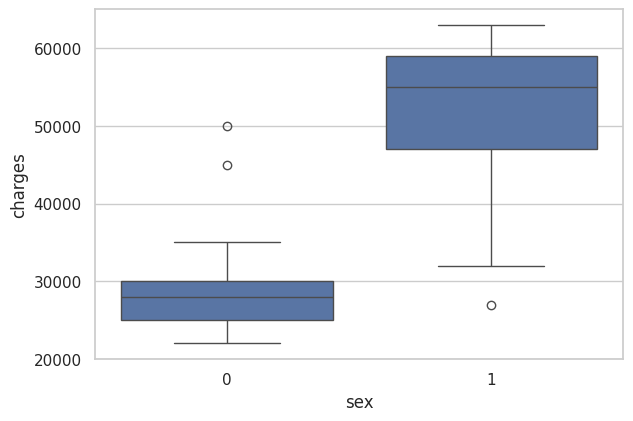

In [53]:

 #Exploratory Data Analysis (EDA)
 #Analyze the data to understand trends and identify potential cost drivers.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Visualize the distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True)
plt.title='Distribution of Healthcare Charges'
plt.xlabel='Charges'
plt.ylabel='Frequency'
plt.show()

# Analyze charges by different categories
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Sex')

plt.subplot(2, 2, 2)
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges by Smoking Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')

plt.subplot(2, 2, 4)
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('Charges vs. BMI')

plt.tight_layout()
plt.show()


In [39]:
#Statistical Analysis
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Load and inspect the dataset
data = pd.read_csv('/content/gpt excel sheet.csv')

# Check for missing values and handle them
print(data.isnull().sum())
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Verify the data
print(data.head())

# Check for multicollinearity
X = data[['age', 'bmi', 'children', 'smoker', 'sex', 'region']]
X = sm.add_constant(X)  # Adds a constant term to the predictors
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# Fit the model
try:
    model = smf.ols('charges ~ age + bmi + children + smoker + sex + region', data=data).fit()
    print(model.summary())
except Exception as e:
    print(f"An error occurred: {e}")


d           0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
   d  age  sex   bmi  children  smoker  region  charges
0  1   22    0  22.5         0       1       1    24000
1  2   35    1  28.3         1       0       2    32000
2  3   46    0  31.2         2       1       3    45000
3  4   52    1  29.5         0       0       0    38000
4  5   29    0  23.7         1       0       1    25000
   Variable         VIF
0     const  191.553996
1       age    6.238222
2       bmi    6.665044
3  children    1.829300
4    smoker    3.015965
5       sex    2.381322
6    region    1.191848
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 03 Se

In [41]:
#Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = data[['age', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 34122973.95876806
R^2 Score: 0.7448940343991621


In [42]:
#Clustering Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


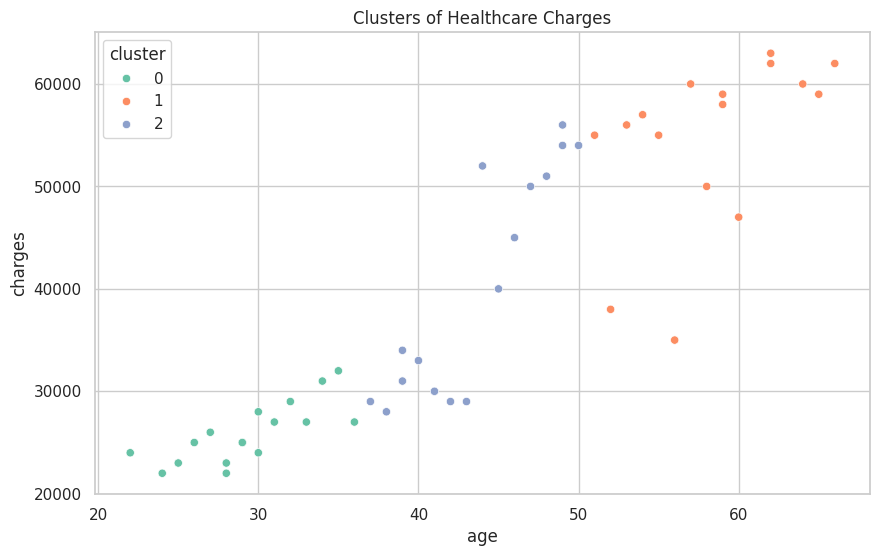

In [47]:
from sklearn.cluster import KMeans

# Prepare data
X = data[['age', 'bmi', 'children', 'smoker', 'region']]

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
data['cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='cluster', data=data, palette='Set2')
plt.title('Clusters of Healthcare Charges')
plt.xlabel='Age'
plt.ylabel='Charges'
plt.show()

In [48]:
#Summary
'''Healthcare Charges vs. Age: Analyze how charges increase with age.
Charges by Region: Identify regional disparities in healthcare costs.
Charges by Smoker Status: Examine the impact of smoking on healthcare costs.
Correlation Matrix: Discover relationships between variables and charges.
Regression Analysis: Understand the combined effects of multiple factors on charges.
Predictive Modeling: Forecast charges and evaluate the performance of your model.
Clustering: Group individuals with similar cost profiles to identify patterns.'''

'Healthcare Charges vs. Age: Analyze how charges increase with age.\nCharges by Region: Identify regional disparities in healthcare costs.\nCharges by Smoker Status: Examine the impact of smoking on healthcare costs.\nCorrelation Matrix: Discover relationships between variables and charges.\nRegression Analysis: Understand the combined effects of multiple factors on charges.\nPredictive Modeling: Forecast charges and evaluate the performance of your model.\nClustering: Group individuals with similar cost profiles to identify patterns.'